In [33]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pickle
from pathlib import Path
from tqdm import tqdm
import math
import utils
from visual_utils import *

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
Path.ls  = lambda x: list(x.iterdir())

In [36]:
path_data = Path('/project/cq-training-1/project1/data/')
path_hdf5 = path_data/'hdf5v7_8bit'

In [37]:
# Shape
orig_metadata = pickle.load(open(path_data/"catalog.helios.public.20100101-20160101.pkl",'rb'))
orig_metadata.shape

(210336, 33)

In [7]:
# Few rows
orig_metadata.tail(3)

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2015-12-31 23:15:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,61,/project/cq-training-1/project1/data/hdf5v5_16...,61,0.0,0.0,night,-3.380000,1.0,...,night,-1.946667,0.0,0.0,night,-1.300000,0.0,0.0,night,0.146667
2015-12-31 23:30:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,62,/project/cq-training-1/project1/data/hdf5v5_16...,62,0.0,0.0,night,-3.433333,1.0,...,night,-3.026667,0.0,0.0,night,-1.606667,0.0,0.0,night,-1.960000
2015-12-31 23:45:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,63,/project/cq-training-1/project1/data/hdf5v5_16...,63,0.0,0.0,night,-3.413333,0.0,...,night,-3.273333,0.0,0.0,night,-1.306667,0.0,0.0,night,-2.213333


In [8]:
# All columns
orig_metadata.columns

Index(['ncdf_path', 'hdf5_8bit_path', 'hdf5_8bit_offset', 'hdf5_16bit_path',
       'hdf5_16bit_offset', 'BND_DAYTIME', 'BND_CLEARSKY_GHI',
       'BND_CLOUDINESS', 'BND_GHI', 'TBL_DAYTIME', 'TBL_CLEARSKY_GHI',
       'TBL_CLOUDINESS', 'TBL_GHI', 'DRA_DAYTIME', 'DRA_CLEARSKY_GHI',
       'DRA_CLOUDINESS', 'DRA_GHI', 'FPK_DAYTIME', 'FPK_CLEARSKY_GHI',
       'FPK_CLOUDINESS', 'FPK_GHI', 'GWN_DAYTIME', 'GWN_CLEARSKY_GHI',
       'GWN_CLOUDINESS', 'GWN_GHI', 'PSU_DAYTIME', 'PSU_CLEARSKY_GHI',
       'PSU_CLOUDINESS', 'PSU_GHI', 'SXF_DAYTIME', 'SXF_CLEARSKY_GHI',
       'SXF_CLOUDINESS', 'SXF_GHI'],
      dtype='object')

In [9]:
metadata = orig_metadata.replace('nan',np.NaN)

In [10]:
# Total number of hdf5_8bit files 
len(path_hdf5.ls())

2191

In [11]:
# Unique values from metadata, no missing files 
len(metadata.hdf5_8bit_path.dropna().unique())

2191

In [12]:
# NaN along columns
metadata.isna().sum()[metadata.isna().sum() >0]

ncdf_path            36619
hdf5_8bit_path          32
hdf5_8bit_offset        32
hdf5_16bit_path         32
hdf5_16bit_offset       32
BND_CLEARSKY_GHI       236
BND_CLOUDINESS         236
BND_GHI                388
TBL_CLEARSKY_GHI       200
TBL_CLOUDINESS         200
TBL_GHI                714
DRA_CLEARSKY_GHI       304
DRA_CLOUDINESS         304
DRA_GHI               1503
FPK_CLEARSKY_GHI       256
FPK_CLOUDINESS         256
FPK_GHI                823
GWN_CLEARSKY_GHI      2735
GWN_CLOUDINESS        2735
GWN_GHI               5062
PSU_CLEARSKY_GHI       537
PSU_CLOUDINESS         537
PSU_GHI                765
SXF_CLEARSKY_GHI       563
SXF_CLOUDINESS         563
SXF_GHI               1321
dtype: int64

In [13]:
# check for missing hdf5 files when ncdf is present  -----> all hdf5 files are present
metadata[metadata.ncdf_path.notna() & metadata.hdf5_8bit_path.isna()]

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,


In [11]:
# check hdf5 files when ncdf is missing    ----> corresponding hdf5 files are empty
temp_df = metadata[metadata.ncdf_path.isna() & metadata.hdf5_8bit_path.notna()]
len(temp_df)

36587

In [153]:
for i,row in tqdm(temp_df.iterrows()):
    f = h5py.File(row['hdf5_8bit_path'],'r')
    idx = row['hdf5_8bit_offset']
    img = utils.fetch_hdf5_sample('ch1',f,idx)
    if img is not None:
        print("Found valid data")

36587it [02:54, 209.48it/s] 


In [11]:
# If ncdf present and hdf5 contains valid data in all keys
temp_df = metadata[metadata.ncdf_path.notna() & metadata.hdf5_8bit_path.notna()]
len(temp_df)

173717

In [11]:
# # takes over 2hrs !!!
# # no elements of hdf5_8bit are missing
# missing = []
# for i,row in tqdm(temp_df.iterrows()):
#     f = h5py.File(row['hdf5_8bit_path'],'r')
#     idx = row['hdf5_8bit_offset']
#     for key in f:
#         if utils.fetch_hdf5_sample(key,f,idx) is None:
#             missing.append((row['hdf5_8bit_path'][-18:],key))

173717it [2:15:11, 21.42it/s]


In [12]:
# missing

[]

## Visualize

In [38]:
# Only valid data
metadata = metadata[metadata.ncdf_path.notna()]
metadata.shape

(173717, 33)

In [39]:
def visualize(df:pd.DataFrame=metadata,n:int=5, start_time:str = 'random', sequence:bool = False, channels:str='1,2,3,4,6'):
    """ Dummy function to get indices and visualize the channels"""
    idxs = req_indices(df,n,start_time,sequence)
    if idxs is None:
        return
    plot_images(df,n,idxs,channels)

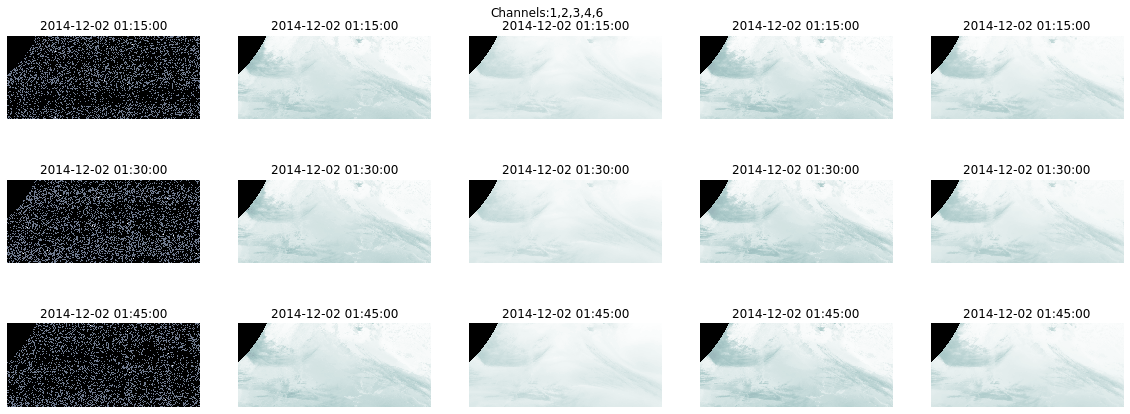

In [40]:
# plot random samples in sequence
visualize(n = 3,sequence=True)

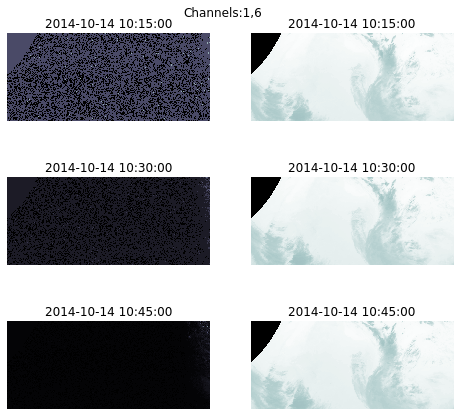

In [41]:
# Use a timestamp and any channel
visualize(n = 3,start_time="2014-10-14 10:15:00",channels="1,6")

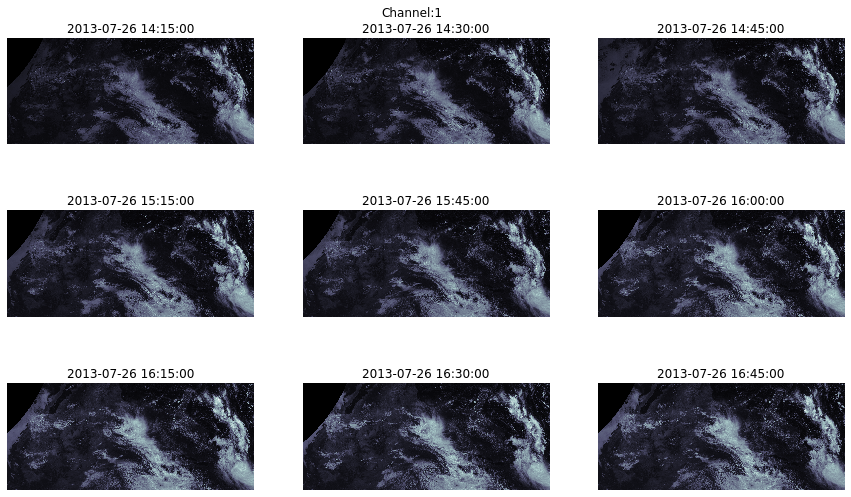

In [42]:
# 3rd image  no black area
visualize(n = 9,start_time="2013-07-26 14:15:00",channels='1')

In [43]:
# Wrong timestamp
visualize(n = 5,start_time = "2010-01-18 21:45:00", sequence=True,channels='all')

Incorrect or Missing TimeStamp


In [44]:
# Some timestamps where channel 1 looks corrupted
"2014-10-14 10:15:00"
"2013-11-05 02:45:00"
"2015-07-05 07:15:00"
"2015-05-04 05:45:00"
"2013-04-28 04:30:00"
"2010-10-24 09:15:00"
"2013-07-29 06:30:00"
"2012-06-07 03:15:00" ## just black

'2012-06-07 03:15:00'

In [45]:
# Day, If any station has 'DAYTIME = 1'
day_metadata = metadata.query('(BND_DAYTIME ==1.0) | (TBL_DAYTIME ==1.0) | (DRA_DAYTIME ==1.0) | (FPK_DAYTIME ==1.0)| \
                              (GWN_DAYTIME ==1.0)|(PSU_DAYTIME ==1.0)| (SXF_DAYTIME ==1.0)')
day_metadata.shape

(106108, 33)

In [46]:
# NaN along columns for day_metadata
day_metadata.isna().sum()[day_metadata.isna().sum() >0]

BND_CLEARSKY_GHI     176
BND_CLOUDINESS       176
BND_GHI              287
TBL_CLEARSKY_GHI     163
TBL_CLOUDINESS       163
TBL_GHI              503
DRA_CLEARSKY_GHI     186
DRA_CLOUDINESS       186
DRA_GHI              271
FPK_CLEARSKY_GHI     204
FPK_CLOUDINESS       204
FPK_GHI              544
GWN_CLEARSKY_GHI    1580
GWN_CLOUDINESS      1580
GWN_GHI             3567
PSU_CLEARSKY_GHI     325
PSU_CLOUDINESS       325
PSU_GHI              527
SXF_CLEARSKY_GHI     389
SXF_CLOUDINESS       389
SXF_GHI              745
dtype: int64

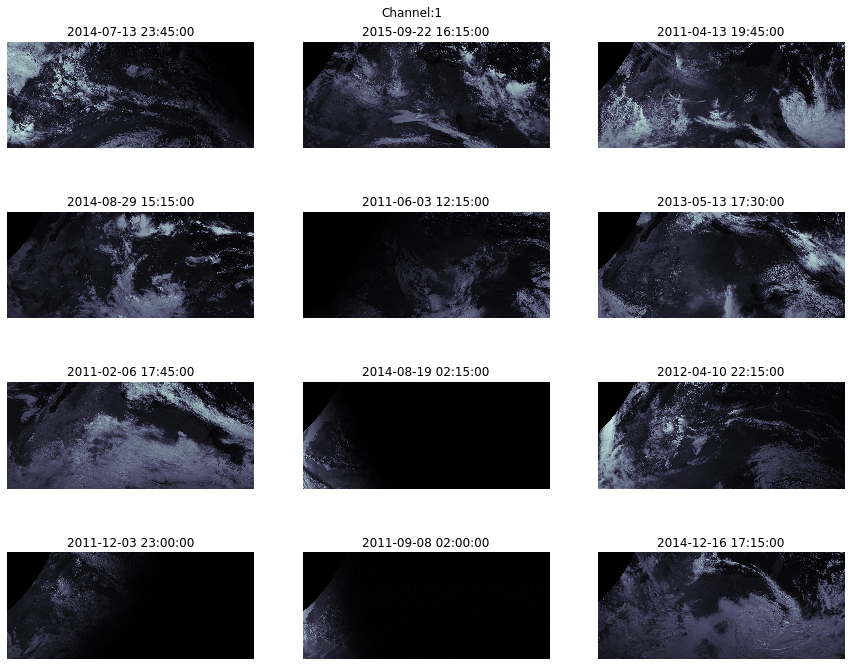

In [47]:
visualize(day_metadata,n = 12,channels='1')

## Deal with Corrupted Images

In [16]:
# # unique pixel values for each image in day_metadata takes  over 1 hr !!!!
# uv_day = []
# for i,row in tqdm(day_metadata.iterrows()):
#     uv_day.append(len(np.unique(get_channel_data(row,chs='1'))))
# with open("day_pix",'wb') as f:
#     pickle.dump(uv_day,f)

106108it [1:26:31, 20.44it/s]


In [17]:
# # unique pixel values for each image in full metadata takes over 1 hr !!!!
# uv_full = []
# for i,row in tqdm(metadata.iterrows()):
#     uv_full.append(len(np.unique(get_channel_data(row,chs='1'))))
# with open('all_pix','wb') as f:
#     pickle.dump(uv_full,f)

173717it [1:58:43, 24.39it/s]


In [48]:
# Load the saved values for full metadata
with open('./pixel_data/all_pix','rb') as f:
    pix_full = np.array(pickle.load(f))

In [49]:
# load the saved values for day_metadata
with open('./pixel_data/day_pix','rb') as f:
    day_pix = np.array(pickle.load(f))

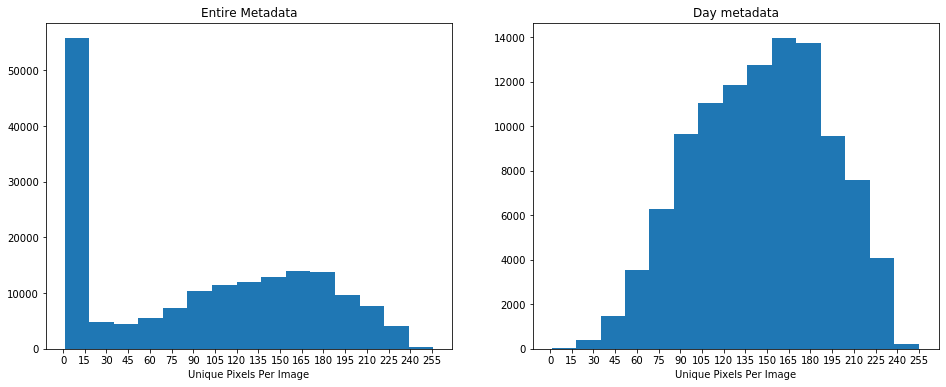

In [50]:
# Plot histogram
_,axs = plt.subplots(1,2,figsize=(16,6),sharex=True)
plt.setp(axs, xticks=range(0,270,15),xlabel='Unique Pixels Per Image')
axs[0].hist(pix_full,15)
axs[0].set_title("Entire Metadata")
axs[1].hist(day_pix,15)
axs[1].set_title("Day metadata")
plt.show()

In [51]:
def plot_pixel_range(df:pd.DataFrame=metadata,s:int=1000,n:int=9,start:int=0,stop:int=15):
    """"Samples 's' points, plots 'n' random images that are between start and stop unique pixels."""
    req_idx= []
    idxs = req_indices(df,s)
    for idx in idxs:
        img = get_channel_data(df.loc[df.index[idx]],'1')
        if len(np.unique(img))>start and  len(np.unique(img)) <=stop:
            if len(req_idx)==n:
                break
            req_idx.append(idx)

    plot_images(df,n,req_idx,channels='1')

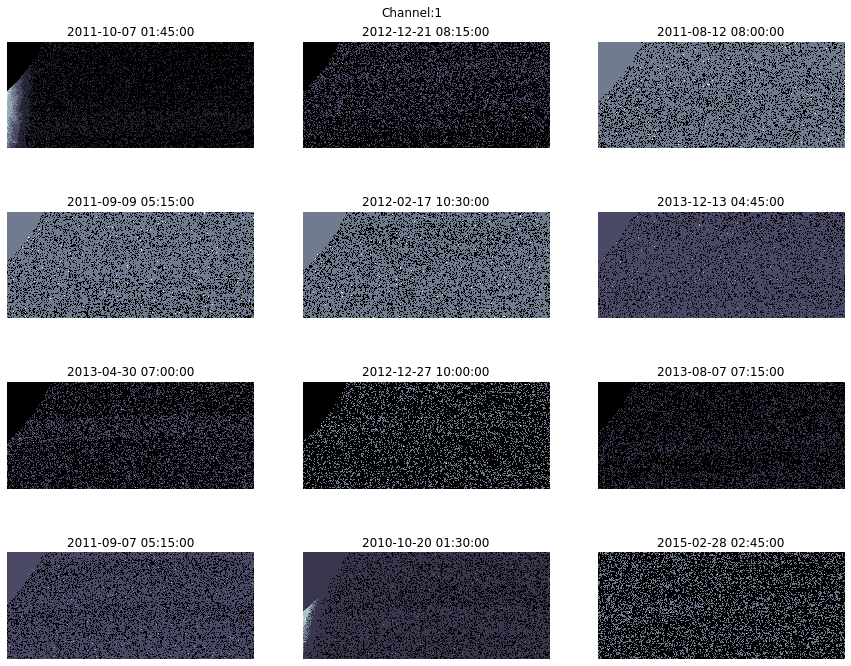

In [52]:
# Less than 15 unique pixels
plot_pixel_range(metadata,n=12,stop=15)

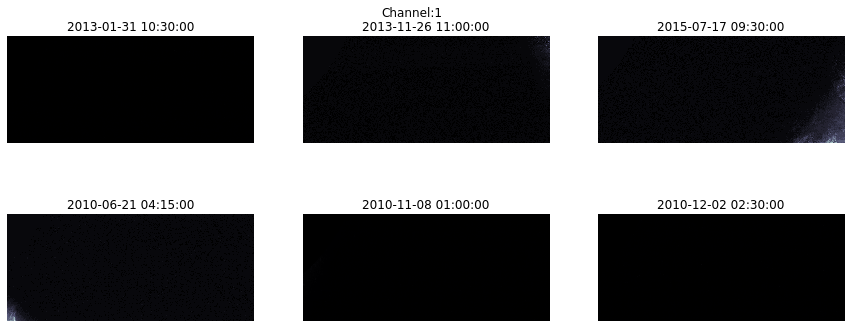

In [53]:
# Between 15-30 unique pixels
plot_pixel_range(metadata,n=6,start=15,stop=30)

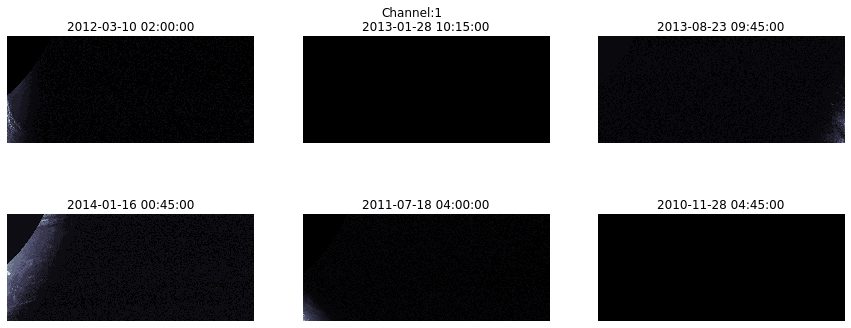

In [54]:
# Between 30-45 unique pixels
plot_pixel_range(metadata,n=6,start=15,stop=30)

## Draw stations on the Image

In [56]:
# Lats and Longs for stations
stations = {'BND':(40.05192,-88.37309),'TBL':(40.12498,-105.2368),'DRA':(36.62373,-116.01947), \
            'FPK':(48.30783,-105.1017),'GWN':(34.2547,-89.8729),'PSU':(40.72012,-77.93085), \
            'SXF':(43.73403,-96.62328)}

In [57]:
def plot_stations(row:pd.Series,stations:dict):
    """Plot the stations on the image"""
    imgs = get_channel_data(row)
    pixs = image_pixels(row,stations)
    _,axs = plt.subplots(2,3,figsize=(20,5))
    axs = axs.flatten()
    for i,img in enumerate(imgs):
        show_image(axs[i],img,f"Channel:{i+1}")
        for j,key in enumerate(pixs):
            axs[i].add_patch(Circle((pixs[key][1],pixs[key][0]),10,color=utils.get_label_color_mapping(j+1)/255))
            # Take care of  plotting  x,y  --> j,i  array index  

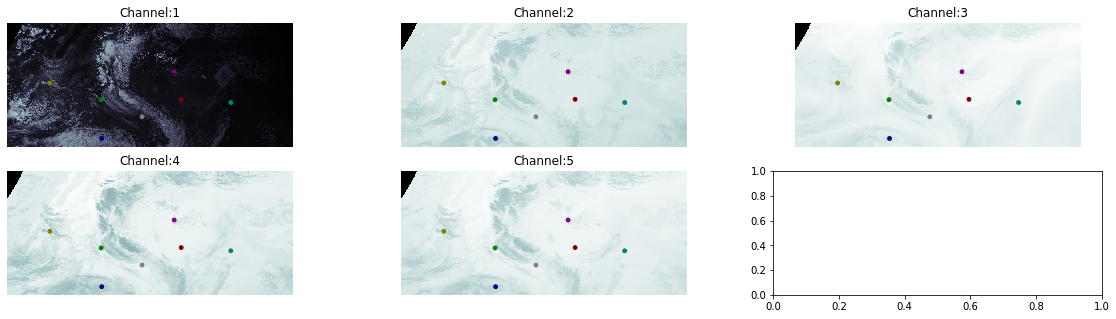

In [58]:
plot_stations(day_metadata.iloc[13],stations)

### Get Crops

In [59]:
# Crops of Channel 1
def get_crops(row:pd.Series,stations:dict,size:int=30):
    """Get Crops of 'size' pixels for each station and plots the crops with stations"""
    img = get_channel_data(row,chs='1')
    pixs = image_pixels(row,stations)
    _,axs = plt.subplots(2,4,figsize=(8,4))
    axs = axs.flatten()
    for i,key in enumerate(pixs):
        n_img = img[pixs[key][0]-size//2:pixs[key][0]+size//2,pixs[key][1]-size//2:pixs[key][1]+size//2]
        show_image(axs[i],n_img,key)
        axs[i].add_patch(Circle((size//2,size//2),2,color=utils.get_label_color_mapping(i+1)/255))
        
    axs[7].axis('off')

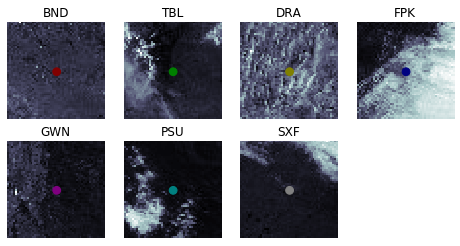

In [60]:
row = day_metadata.iloc[50]
get_crops(row,stations,size=50)

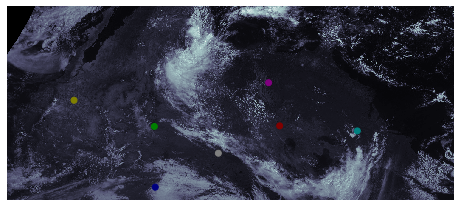

In [61]:
# Corresponding Image
_,ax = plt.subplots(1,1,figsize=(8,6))
show_image(ax,get_channel_data(day_metadata.iloc[50],chs='1'))
pixs = image_pixels(row,stations)
for j,key in enumerate(pixs):
    ax.add_patch(Circle((pixs[key][1],pixs[key][0]),10,color=utils.get_label_color_mapping(j+1)/255))

### Other Things to know abot hdf5 files

In [62]:
row = day_metadata.iloc[10]
f = h5py.File(row.hdf5_8bit_path,'r')   

In [63]:
#Compressed data keys
f.keys() 

<KeysViewHDF5 ['ch1', 'ch1_LUT', 'ch2', 'ch2_LUT', 'ch3', 'ch3_LUT', 'ch4', 'ch4_LUT', 'ch6', 'ch6_LUT', 'lat', 'lat_LUT', 'lon', 'lon_LUT', 'ncdf_path', 'ncdf_path_LUT']>

In [64]:
# hdf5 file attribute keys:
f.attrs.keys()

<KeysViewHDF5 ['global_dataframe_end_idx', 'global_dataframe_end_time', 'global_dataframe_start_idx', 'global_dataframe_start_time']>

In [65]:
f.attrs['global_dataframe_start_time'],f.attrs['global_dataframe_end_time'],

('2010.04.14.0800', '2010.04.15.0745')

In [66]:
f.attrs['global_dataframe_start_idx'],f.attrs['global_dataframe_end_idx']

(9888, 9984)

In [67]:
# Number of files present 
f.attrs['global_dataframe_end_idx']-f.attrs['global_dataframe_start_idx']

96

### MiSc InFo

In [68]:
index_df = day_metadata.index

The following data of a day goes from 2010-04-14 19:00:00 to 2010-04-15 19:00:00  
approx. 8 hr gap between 02:15:00 to 10:45:00, where all stations go dark hence timestamps missing

In [69]:
day_metadata.loc[index_df[0:60],['BND_DAYTIME','TBL_DAYTIME','DRA_DAYTIME','FPK_DAYTIME','GWN_DAYTIME','PSU_DAYTIME','SXF_DAYTIME']]

,BND_DAYTIME,TBL_DAYTIME,DRA_DAYTIME,FPK_DAYTIME,GWN_DAYTIME,PSU_DAYTIME,SXF_DAYTIME
iso-datetime,,,,,,,
2010-04-14 19:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 19:15:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 19:45:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 20:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 20:15:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 20:30:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 20:45:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 21:15:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-04-14 21:30:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
